In [4]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from scipy.spatial import Delaunay

MAP_DIR = '/home/viki/PFE/result/08_29/'
MAP_POINTS = MAP_DIR + 'allMapPoints.txt'

## Load ORB points

In [2]:
class MapOrb:
    def __init__(self, map_points_dir, num=2):
        self.__threshold = num
        map_path = Path(map_points_dir)
        if not map_path.exists():
            print("[ERROR] Map file not exists! ")
            return 0
        map_points_file = open(map_points_dir, 'r') 
        map_points_lines = map_points_file.readlines() 
        self.__num_points = int(len(map_points_lines)/5)
        self.__map_points = []
        self.__point_des = []
        for i in range(self.__num_points):
            x = float(map_points_lines[5*i+0][1:-2])
            y = float(map_points_lines[5*i+1][1:-2])
            z = float(map_points_lines[5*i+2][1:-2])
            des = map_points_lines[5*i+3][1:-2].split(',')
            desss = np.zeros(32, dtype=np.int8)
            for j in range(32):
                desss[j] = int(des[j])
            if abs(x)+abs(y)+abs(z) < self.__threshold :
                self.__map_points.append([x,y,z])
                self.__point_des.append(desss)
        self.__map_points = np.asarray(self.__map_points)
        self.__num_points = len(self.__map_points)
    
    def set_threshold(self, num):
        self.__threshold = num
    
    def print_points(self):
        for i in range(self.__num_points):
            print(self.__map_points[i])
            
    def write_ply_array(self,fn,verts ):
        ply_header = '''ply
                format ascii 1.0
                element vertex %(vert_num)d
                property float x
                property float y
                property float z
                property uchar blue
                property uchar green
                property uchar red
                end_header
                '''
        with open(fn, 'wb') as f:
            f.write((ply_header % dict(vert_num=len(verts))).encode('utf-8'))
            np.savetxt(f, verts, fmt='%f %f %f %d %d %d')
            
    def ply_map(self, outdir):
        fn = outdir + 'orb_points.ply'
        verts = np.zeros((self.__num_points, 6))
        verts[:,0:3] = self.__map_points
        verts[:,3:6] = [255,255,255]
        self.write_ply_array(fn,verts)

In [6]:
mapp = MapOrb(MAP_POINTS ,4)
mapp.ply_map('res/')

## Delaunay

In [102]:
points = mapp._MapOrb__map_points

In [103]:
tri = Delaunay(points)

In [104]:
tri.simplices

array([[1109, 5882, 5193, 1131],
       [1447, 5431, 5543, 1131],
       [1447, 5882, 5193, 1131],
       ...,
       [1643, 1645, 1983, 1147],
       [1643, 1556, 1983, 1147],
       [1643, 1556, 1645, 1983]], dtype=int32)

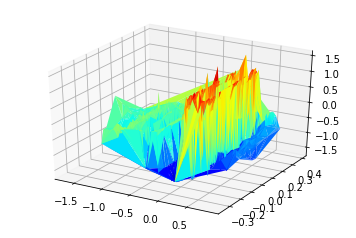

In [123]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], -points[:,2], cmap=cm.jet, linewidth=0.01)
plt.show()

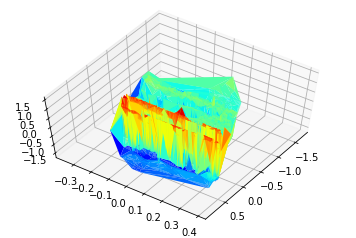

In [125]:
ax.view_init(60, 35)
fig

## another example

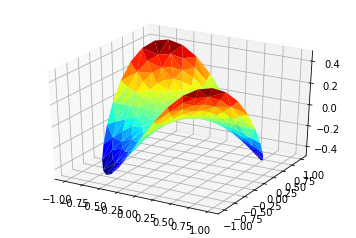

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

plt.show()